In [1]:
from scipy import *
from astropy.io import fits
import WLanalysis

In [100]:
plane_massive = fits.open('sample_maps/mnv0.10000_om0.30000_As2.1000/snap60_potentialPlane2_normal0.fits')[0].data
plane_massles = fits.open('sample_maps/mnv0.00000_om0.30000_As2.1000/snap60_potentialPlane2_normal0.fits')[0].data

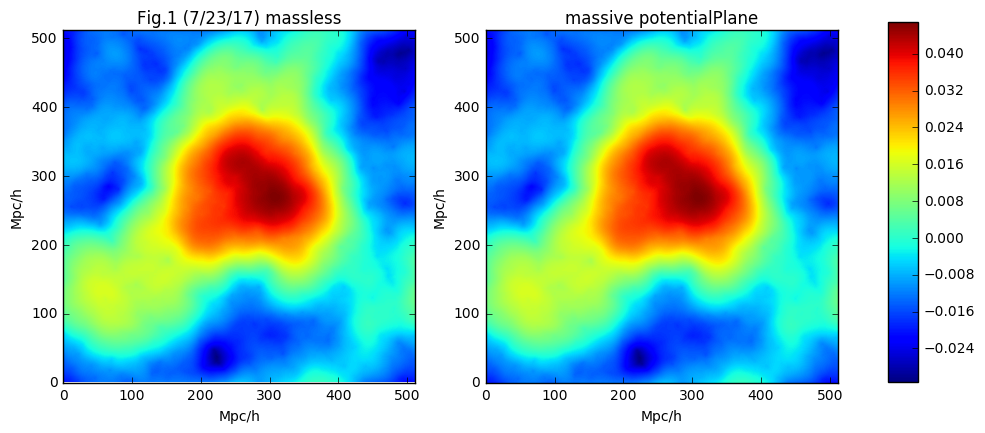

In [110]:
f=figure(figsize=(10,6))
ax1=f.add_subplot(121)
ax2=f.add_subplot(122)

clb1=ax1.imshow(plane_massles,extent=[0,512, 0,512])
ax1.set_xlabel('Mpc/h')
ax1.set_ylabel('Mpc/h')
ax1.set_title('Fig.1 (7/23/17) massless')

ax2.imshow(plane_massive,extent=[0,512, 0,512])
ax2.set_xlabel('Mpc/h')
ax2.set_ylabel('Mpc/h')
ax2.set_title('massive potentialPlane')

cbar_ax = f.add_axes([0.95, 0.22, 0.03, 0.6])
f.colorbar(clb2, cax=cbar_ax)
show()

In [55]:
conv_massive_z1 = fits.open('sample_maps/mnv0.10000_om0.30000_As2.1000/WLconv_z1.00_0999r.fits')[0].data
conv_massles_z1 = fits.open('sample_maps/mnv0.00000_om0.30000_As2.1000/WLconv_z1.00_0999r.fits')[0].data
#conv_massive_z2 = fits.open('sample_maps/mnv0.10000_om0.30000_As2.1000/WLconv_z2.00_0999r.fits')[0].data
#conv_massles_z2 = fits.open('sample_maps/mnv0.00000_om0.30000_As2.1000/WLconv_z2.00_0999r.fits')[0].data

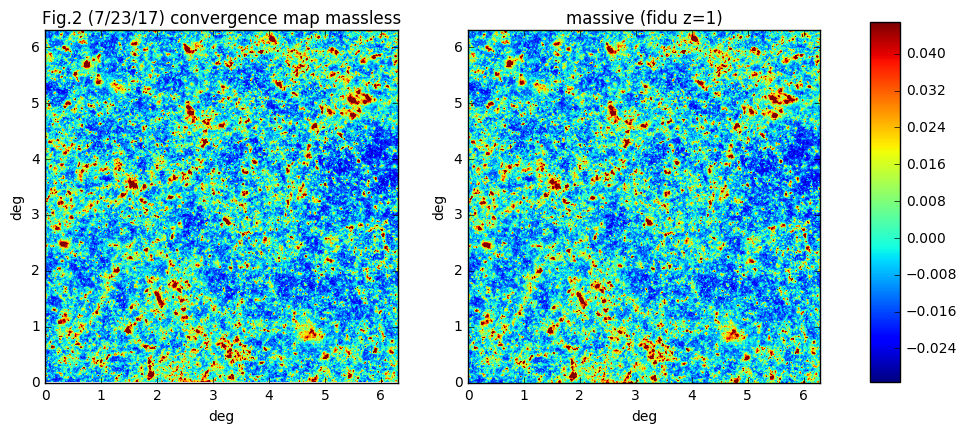

In [109]:
istd = std(conv_massive_z1)

f=figure(figsize=(10,6))
ax1=f.add_subplot(121)
ax2=f.add_subplot(122)

clb1=ax1.imshow(conv_massles_z1,extent=[0,6.3, 0,6.3],vmin=-2*istd, vmax=3*istd)
ax1.set_xlabel('deg')
ax1.set_ylabel('deg')
ax1.set_title('Fig.2 (7/23/17) convergence map massless')

clb2=ax2.imshow(conv_massive_z1,extent=[0,6.3, 0,6.3],vmin=-2*istd, vmax=3*istd)
ax2.set_xlabel('deg')
ax2.set_ylabel('deg')
ax2.set_title('massive (fidu z=1)')

cbar_ax = f.add_axes([0.95, 0.22, 0.03, 0.6])
f.colorbar(clb2, cax=cbar_ax)
show()

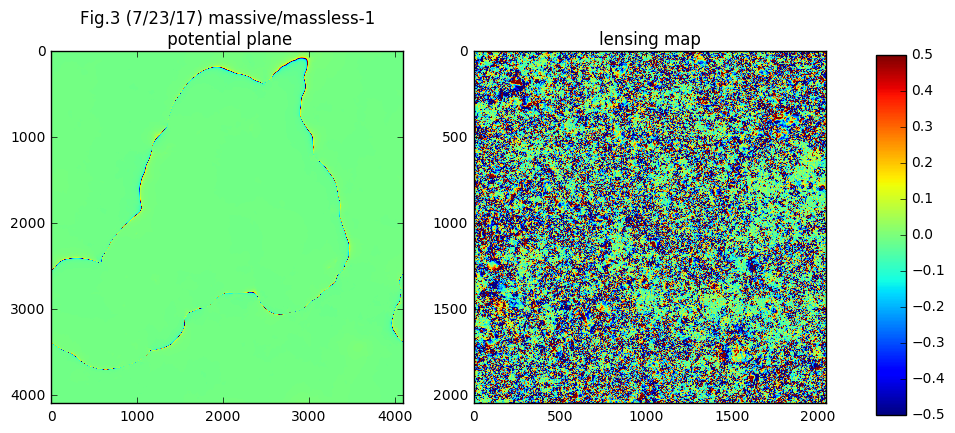

In [108]:
f=figure(figsize=(10,6))
ax1=f.add_subplot(121)
ax2=f.add_subplot(122)

clb1=ax1.imshow(plane_massive/plane_massles-1,vmin=-0.5,vmax=0.5)

clb2=ax2.imshow(conv_massive_z1/conv_massles_z1-1,vmin=-0.5,vmax=0.5)
cbar_ax2 = f.add_axes([0.95, 0.2, 0.03, 0.6])
f.colorbar(clb2, cax=cbar_ax2)

ax1.set_title('Fig.3 (7/23/17) massive/massless-1\n potential plane')
ax2.set_title('lensing map')

show()

In [88]:
ell, ps0_z1 = WLanalysis.PowerSpectrum(conv_massles_z1, sizedeg = 6.3**2)
ell, ps1_z1 = WLanalysis.PowerSpectrum(conv_massive_z1, sizedeg = 6.3**2)

In [91]:
ell0_As, ps0_As = genfromtxt('/Users/jia/Desktop/nicaea_2.7/Demo/P_kappa_fidumassless_As').T
ell0_s8, ps0_s8 = genfromtxt('/Users/jia/Desktop/nicaea_2.7/Demo/P_kappa_fidumassless_s8').T
ell0_s8_linear, ps0_s8_linear = genfromtxt('/Users/jia/Desktop/nicaea_2.7/Demo/P_kappa_massless_s8_linear').T

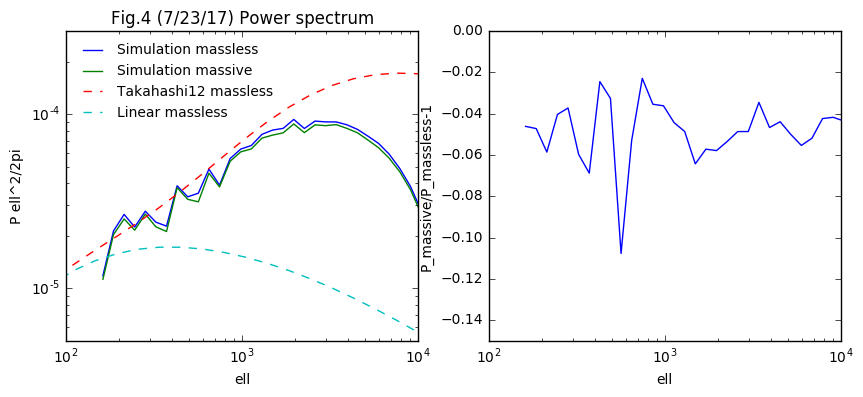

In [111]:
f=figure(figsize=(10,4))
ax1=f.add_subplot(121)
ax2=f.add_subplot(122)
ax1.loglog(ell, ps0_z1,label='Simulation massless')
ax1.loglog(ell, ps1_z1,label='Simulation massive')
#loglog(ell_As, ps_As,'--',label='nicaea, normalization=A_s')
ax1.loglog(ell_s8, ps_s8,'--',label='Takahashi12 massless')
ax1.loglog(ell0_s8_linear, ps0_s8_linear,'--',label='Linear massless')
#loglog(ell_nicaea_linear, ps_nicaea_linear,'--')
ax1.set_xlabel('ell')
ax1.set_ylabel('P ell^2/2pi')
ax1.set_xlim(1e2, 1e4)
ax1.set_ylim(5e-6, 3e-4)
ax1.legend(loc=0,frameon=0,fontsize=10)
ax1.set_title('Fig.4 (7/23/17) Power spectrum')

ax2.plot(ell, ps1_z1/ps0_z1-1)
ax2.set_xscale('log')
ax2.set_xlim(1e2, 1e4)
ax2.set_ylim(-.15,0)
ax2.set_xlabel('ell')
ax2.set_ylabel('P_massive/P_massless-1')

show()